In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import umap
import umap.umap_ as umap
import umap.plot
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

/usr/lib/python3/dist-packages/mpl_toolkits/__init__.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  __import__('pkg_resources').declare_namespace(__name__)
/home/sm/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/sm/.local/lib/python3.10/site-packages/numba/np/ufunc/dufunc.py:344: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for th

In [2]:
# 1) 발현 데이터 로드 (샘플 × 유전자 형태 CSV)
#   Gene symbol 컬럼이 index인 형태여야 함.
df = pd.read_csv("/disk0/sm/project/addiction/data/df_GDS3703_sample_x_gene_all_excluding_none.csv", index_col=0)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,31713,31714,31715,31716,31717,31718,31719,31720,31721,31722
GSM396130,6.38031,6.27131,7.10850,8.66881,11.9632,6.43373,11.7617,7.00935,6.54501,6.75374,...,7.23456,7.01320,8.45029,6.40799,7.99012,6.36030,7.52806,9.94654,6.14462,6.43310
GSM396134,6.20091,6.11467,6.58901,8.82602,12.1538,6.55181,11.1368,7.10128,6.90154,6.71742,...,7.58545,6.70985,8.03670,6.32919,8.26842,6.58269,7.60551,10.05480,6.42374,6.67878
GSM396138,6.34006,6.10706,7.10034,8.94242,11.9129,6.61583,11.5998,7.25498,6.83531,6.62876,...,7.26437,7.01657,8.57637,6.20496,8.03519,6.29919,7.63628,9.98792,6.00854,6.40413
GSM396140,6.27140,6.28007,7.10063,8.52398,12.0166,6.49740,11.7574,6.87667,6.45795,6.61066,...,7.29411,7.18063,8.17280,6.13062,8.10922,6.31158,7.56554,9.98427,6.11586,6.80955
GSM396144,6.30320,6.29366,6.96477,8.37914,12.0821,6.55394,11.4929,6.73225,6.54233,6.74417,...,7.10288,6.86318,7.82371,6.30980,7.92494,6.34884,7.35192,10.19380,6.03524,6.60135


In [3]:
# 데이터프레임 전체의 최대 최소값
df.max().max(), df.min().min()

(np.float64(16.0811), np.float64(5.30474))

In [4]:
# 2) 고변이 유전자 선택
# 모든 31723개 유전자를 쓰지 않고, 분산이 큰 상위 약 2000개 유전자만 선택
selector = VarianceThreshold(threshold=0.1)  # 분산 0.1 이상만 선택
X_reduced = selector.fit_transform(df.values)  # ID_REF 행은 빼고 df[1:]
X_reduced, X_reduced.shape

(array([[ 9.809  , 10.2338 , 10.1625 , ..., 11.3894 ,  7.03212,  8.45029],
        [ 9.80428, 10.1397 , 10.2108 , ..., 11.5755 ,  6.7336 ,  8.0367 ],
        [ 9.76099, 10.094  ,  9.92611, ..., 11.6009 ,  6.79255,  8.57637],
        ...,
        [ 8.60679, 10.5753 , 10.7863 , ...,  8.30702,  6.88068,  7.89683],
        [ 9.67037, 10.048  , 10.6658 , ...,  9.17523,  6.67189,  7.89377],
        [ 9.33812,  9.87753, 10.5787 , ...,  9.01367,  6.54174,  7.87406]],
       shape=(96, 1923)),
 (96, 1923))

In [5]:
np.max(X_reduced), np.min(X_reduced)

(np.float64(15.9949), np.float64(5.4852))

In [6]:
# 3) PCA 차원 축소
# 1923 차원도 여전히 많으므로 32차원으로 축소
pca = PCA(n_components=32, random_state=0)
X_pca = pca.fit_transform(X_reduced)
X_pca, X_pca.shape

(array([[ -3.31321172,   8.68377092,   3.78069182, ...,  -1.20376662,
          -0.75109774,  -0.99034832],
        [ -4.17412739,   9.42809291,  -2.36290551, ...,  -0.84978874,
          -0.31142741,   0.93619414],
        [ -2.75223458,   8.31000316,   3.42436425, ...,   0.7070704 ,
          -0.86041042,   0.27181547],
        ...,
        [-16.64031317,  -7.28263007,   7.73035579, ...,  -0.95327191,
          -0.95362719,   0.41529712],
        [ -9.86094931,   0.22253743,  -4.44330455, ...,   0.78270466,
           1.11769758,  -1.96837438],
        [ -6.89995099,  -2.27163023,  -3.4322776 , ...,   0.04469523,
           1.99394071,   0.6867197 ]], shape=(96, 32)),
 (96, 32))

In [7]:
np.max(X_pca), np.min(X_pca)

(np.float64(20.400743821098065), np.float64(-21.97582037574684))

In [8]:
# 4) UMAP (2차원 시각화용)
# 50 차원으로 축소된 샘플의 구조확인을 위해 인간이 알아보기 편한 2차원 그림으로 시각화 1
rs = 2
reducer = umap.UMAP(random_state=rs)
X_umap_unscaled = reducer.fit_transform(X_pca)
X_umap = MinMaxScaler(feature_range=(1, 10)).fit_transform(X_umap_unscaled)
X_umap.shape, np.min(X_umap_unscaled), np.max(X_umap_unscaled), np.min(X_umap), np.max(X_umap)

/home/sm/.local/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


((96, 2),
 np.float32(-1.5842885),
 np.float32(9.282286),
 np.float32(1.0),
 np.float32(10.0))

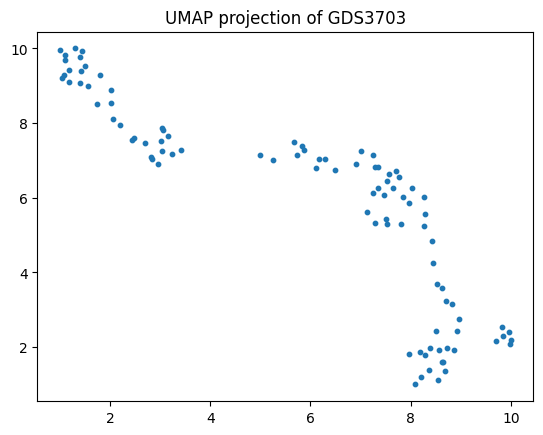

In [ ]:
plt.scatter(X_umap[:, 0], X_umap[:, 1], s=10)
# plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of GDS3703', fontsize=12)

/home/sm/.local/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/sm/.local/lib/python3.10/site-packages/datashader/transfer_functions/__init__.py:340: RuntimeWarning: invalid value encountered in divide
  scaled_data = (data - span[0])/(span[1] - span[0])


<Axes: >

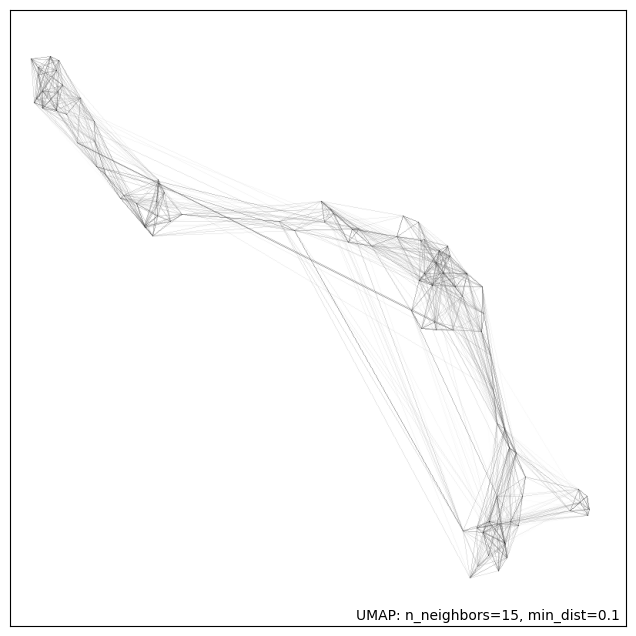

In [11]:
mapper = umap.UMAP(random_state=rs).fit(X_pca)
umap.plot.connectivity(mapper, show_points=True)

/home/sm/.local/lib/python3.10/site-packages/umap/plot.py:895: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  warn(


<Axes: >

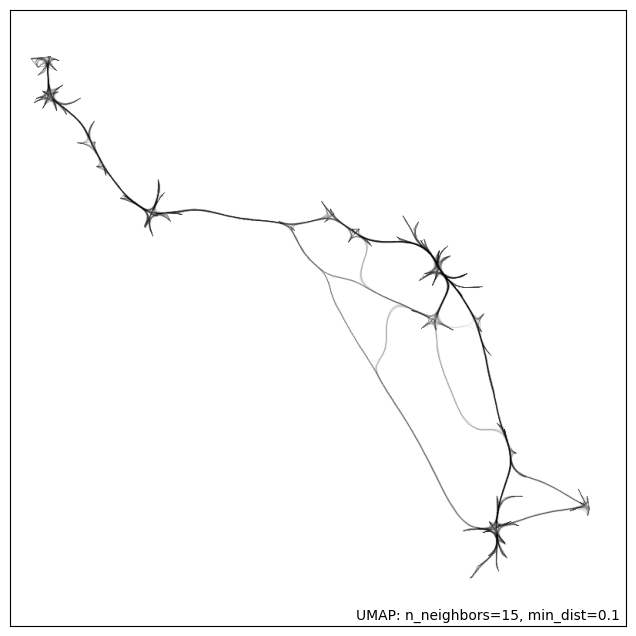

In [12]:
umap.plot.connectivity(mapper, edge_bundling='hammer')

In [13]:
# 5) 클러스터링 (K-means)
# 50차원을 1차원으로 축소하면서 K 그룹으로 군집화 
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(X_pca)
clusters, clusters.shape

(array([1, 1, 1, 1, 0, 0, 0, 0, 4, 2, 2, 1, 2, 3, 3, 3, 1, 1, 0, 2, 1, 2,
        2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1, 3, 2, 3, 3, 3, 1, 0, 2,
        1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 3, 4, 2, 1, 1, 2, 4, 3, 2, 3, 4, 1,
        0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 0, 0, 4, 0, 2, 2, 1, 3, 3, 2, 3,
        3, 1, 0, 2, 4, 2, 2, 2], dtype=int32),
 (96,))

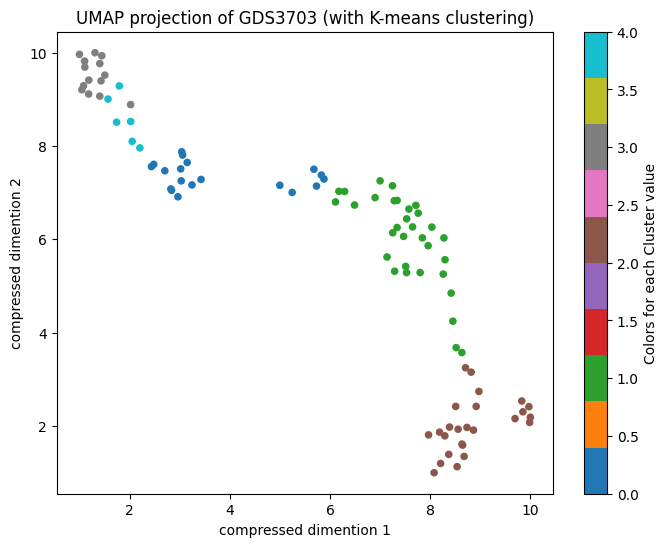

In [14]:
# 6) K-means 알고리즘으로 얻어진 레이블로 색을 입혀서 UMAP 임베딩 데이터 재시각화
plt.figure(figsize=(8,6))
plt.scatter(X_umap[:,0], X_umap[:,1], c=clusters, cmap="tab10", s=20)
plt.title("UMAP projection of GDS3703 (with K-means clustering)")
plt.xlabel("compressed dimention 1")
plt.ylabel("compressed dimention 2")
plt.colorbar(label="Colors for each Cluster value")
plt.show()

In [ ]:
sample = pd.read_csv('/disk0/sm/project/addiction/data/sample_info.txt', sep='\t')
# /sample.head()
target = pd.merge(df, sample, left_index=True, right_on='sample', how='left')
target = target.set_index('sample').loc[df.index]  # df 순서로 재정렬

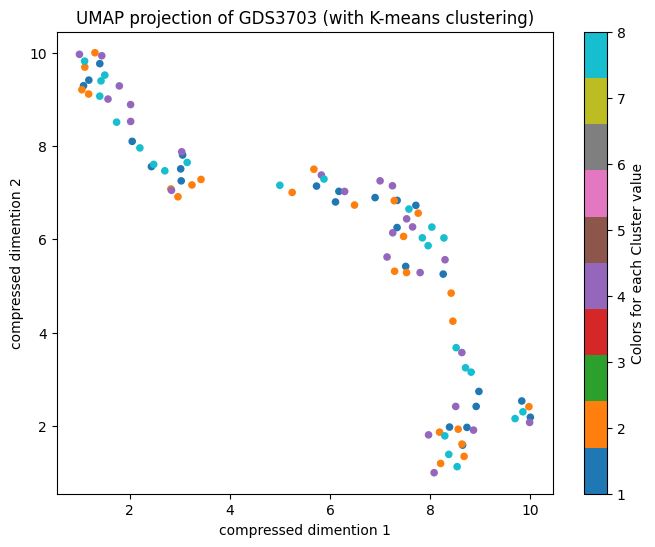

In [20]:
# 6) K-means 알고리즘으로 얻어진 레이블로 색을 입혀서 UMAP 임베딩 데이터 재시각화
plt.figure(figsize=(8,6))
plt.scatter(X_umap[:,0], X_umap[:,1], c=target['time_num'].to_list(), cmap="tab10", s=20)
plt.title("UMAP projection of GDS3703 (with K-means clustering)")
plt.xlabel("compressed dimention 1")
plt.ylabel("compressed dimention 2")
plt.colorbar(label="Colors for each Cluster value")
plt.show()

In [28]:
agent_colors = {
    "cocaine": "#db1f1f",
    "ethanol": "#2B3499",
    "heroin": "#FF9209",
    "methamphetamine": "#6C22FF",
    "morphine": "#22FF6C",
    "nicotine": "#4D4D4D",  # grey30 → hex
    "saline": "#BEBEBE"     # R의 grey → hex (밝은 회색)
}

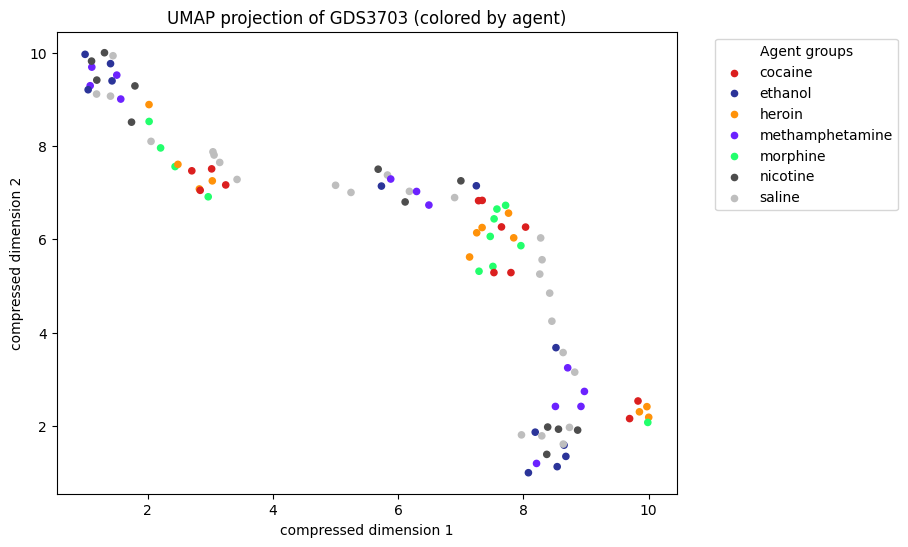

In [29]:
from sklearn.preprocessing import LabelEncoder

# 2) target['agent'] → 색상 벡터로 변환
colors = target['agent'].map(agent_colors)

# 3) 산점도 그리기
plt.figure(figsize=(8,6))
plt.scatter(
    X_umap[:,0], X_umap[:,1],
    c=colors, s=20
)
plt.title("UMAP projection of GDS3703 (colored by agent)")
plt.xlabel("compressed dimension 1")
plt.ylabel("compressed dimension 2")

# 4) 범례 추가
for agent, color in agent_colors.items():
    plt.scatter([], [], c=color, label=agent, s=20)
plt.legend(title="Agent groups", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()